# In clustering project we dont have Y column we perform everything on x column only

## Read dataset

In [1]:
import pandas as pd
A = pd.read_csv(r"C:\Users\Pranit\OneDrive\Desktop\AI\AI\Cars93.csv")
from warnings import filterwarnings
filterwarnings("ignore")

### As we know mainly our customers keep in mind price and mileage while buying a car

In [2]:
B = A[["Price","MPG.city"]]
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
C = pd.DataFrame(mm.fit_transform(B),columns=["Price","MPG.city"])
C.head()

,Price,MPG.city
0,0.155963,0.322581
1,0.486239,0.096774
2,0.398165,0.161290
3,0.555963,0.129032
4,0.414679,0.225806


###  Select the number K to decide the number of clusters.

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(C)
model.labels_

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1])

### Plotting to see which points belong to which clusters

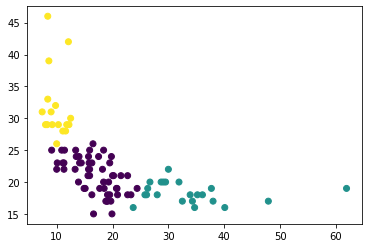

In [4]:
import matplotlib.pyplot as plt
plt.scatter(A.Price,A['MPG.city'],c=model.labels_)

In [5]:
B['clusters']=model.labels_
B['Make']=A.Make

In [6]:
B

,Price,MPG.city,clusters,Make
0,15.9,25,0,Acura Integra
1,33.9,18,1,Acura Legend
2,29.1,20,1,Audi 90
3,37.7,19,1,Audi 100
4,30.0,22,1,BMW 535i
...,...,...,...,...
88,19.7,17,0,Volkswagen Eurovan
89,20.0,21,0,Volkswagen Passat
90,23.3,18,0,Volkswagen Corrado
91,22.7,21,0,Volvo 240


### Now we will give the input as car names and see which suggestions we get

In [7]:
q = input("Enter car name: ")
cc = int(B[B.Make == q].clusters)
print("Your recommendations:\n\n",list(B[(B.clusters == cc)&(B.Make!=q)].Make))

Enter car name: Volkswagen Eurovan
Your recommendations:

 ['Acura Integra', 'Buick Century', 'Buick LeSabre', 'Chevrolet Cavalier', 'Chevrolet Corsica', 'Chevrolet Camaro', 'Chevrolet Lumina', 'Chevrolet Lumina_APV', 'Chevrolet Astro', 'Chevrolet Caprice', 'Chrylser Concorde', 'Chrysler LeBaron', 'Dodge Shadow', 'Dodge Spirit', 'Dodge Caravan', 'Dodge Dynasty', 'Eagle Vision', 'Ford Escort', 'Ford Tempo', 'Ford Mustang', 'Ford Probe', 'Ford Aerostar', 'Ford Taurus', 'Ford Crown_Victoria', 'Honda Prelude', 'Honda Accord', 'Hyundai Elantra', 'Hyundai Sonata', 'Mazda 626', 'Mazda MPV', 'Mercury Capri', 'Mercury Cougar', 'Nissan Altima', 'Nissan Quest', 'Nissan Maxima', 'Oldsmobile Achieva', 'Oldsmobile Cutlass_Ciera', 'Oldsmobile Silhouette', 'Oldsmobile Eighty-Eight', 'Plymouth Laser', 'Pontiac Sunbird', 'Pontiac Firebird', 'Pontiac Grand_Prix', 'Pontiac Bonneville', 'Subaru Loyale', 'Subaru Legacy', 'Toyota Celica', 'Toyota Camry', 'Toyota Previa', 'Volkswagen Fox', 'Volkswagen Passat'

### How many clusters are best clusters we will find with WCSS

In [8]:
k = []
WCSS = []
for i in range(2,20):
    km = KMeans(n_clusters=i)
    model = km.fit(C)
    WCSS.append(model.inertia_)
    k.append(i)

In [9]:
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [10]:
WCSS

[2.984556204508493,
 1.7604339512829654,
 1.2111248917250905,
 0.8123445154970707,
 0.5492495025231653,
 0.44071054572481305,
 0.3662647775622462,
 0.32012324021989985,
 0.2766743422650475,
 0.25294114830970216,
 0.2215526923346274,
 0.19868238346090514,
 0.17906183495285313,
 0.15145941054432052,
 0.13811080546044963,
 0.12761996262472608,
 0.11225435483759057,
 0.10526792971799806]

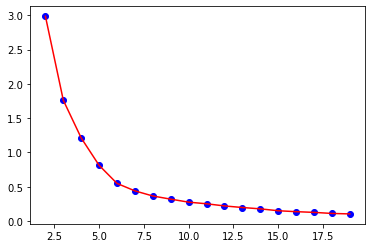

In [11]:
import matplotlib.pyplot as plt                 # plotting elbow curve
plt.scatter(k,WCSS,c="blue")
plt.plot(k,WCSS,c="red")

### From the elbow curve we can say that 6 is the best no of clusters

# Final model

In [12]:
km = KMeans(n_clusters=6)
model = km.fit(C)
model.labels_

array([1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0,
       4, 1, 1, 2, 1, 0, 4, 2, 4, 1, 1, 1, 1, 2, 2, 2, 5, 4, 1, 5, 1, 4,
       1, 1, 1, 3, 0, 0, 0, 0, 4, 4, 1, 2, 0, 0, 3, 1, 2, 4, 0, 4, 1, 2,
       2, 1, 1, 2, 2, 1, 4, 1, 2, 2, 2, 0, 4, 4, 1, 1, 5, 4, 1, 1, 2, 1,
       2, 2, 2, 2, 0])

In [13]:
B['clusters']=model.labels_
B['Make']=A.Make

In [14]:
q = input("Enter car name: ")
cc = int(B[B.Make == q].clusters)
print("Your recommendations:\n\n",list(B[(B.clusters == cc)&(B.Make!=q)].Make))

Enter car name: Volkswagen Eurovan
Your recommendations:

 ['Buick LeSabre', 'Buick Roadmaster', 'Chevrolet Camaro', 'Chevrolet Lumina_APV', 'Chevrolet Astro', 'Chevrolet Caprice', 'Chrylser Concorde', 'Dodge Caravan', 'Eagle Vision', 'Ford Aerostar', 'Ford Taurus', 'Ford Crown_Victoria', 'Mazda MPV', 'Mercury Cougar', 'Nissan Quest', 'Nissan Maxima', 'Oldsmobile Silhouette', 'Oldsmobile Eighty-Eight', 'Pontiac Firebird', 'Pontiac Grand_Prix', 'Pontiac Bonneville', 'Toyota Previa', 'Volkswagen Passat', 'Volkswagen Corrado', 'Volvo 240']


### Now we see more correct recommendations.